In [1]:
!pip install torchviz #QQQ

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=634be38a3c7376a7034e8ba0883b12c77d5ccc577109e6fbc799ff6f986ba1f0
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


In [2]:
import torch
from torchviz import make_dot

In [3]:
a = torch.tensor([2., 3.])
a.requires_grad

False

In [6]:
# Gán thuộc tính requires_grad = True
a = torch.tensor([2., 3.], requires_grad=True)
a.requires_grad # True

# Hoặc
a = torch.tensor([2., 3.])
a.requires_grad = True

In [7]:
a = torch.tensor([2., 3.], requires_grad=True)
a.requires_grad # True
b = a**2
c = 2*b
print(b.requires_grad) # True
print(c.requires_grad) # True

True
True


In [8]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([1., 1.])

print(a.requires_grad) # True
print(b.requires_grad) # False

c = a + b # [3., 4.]
print(c.requires_grad) # True

True
False
True


In [9]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

y_hat = a*x + b
z = y_hat - y
L = z**2

In [10]:
print(x.is_leaf) # True
print(a.is_leaf) # True
print(y_hat.is_leaf) # False
print(L.is_leaf) # False

True
True
False
False


In [11]:
L.backward()

print(a.grad) # -30
print(b.grad) # -10

tensor([-30.])
tensor([-10.])


In [12]:
print(x.grad_fn) # None
print(a.grad_fn) # None
print(y_hat.grad_fn) # AddBackward0 
print(z.grad_fn) # SubBackward0 
print(L.grad_fn) # PowBackward0

None
None


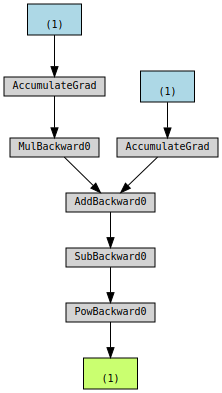

In [13]:
make_dot(L)

In [14]:
class MySquare(torch.autograd.Function):

  @staticmethod
  def forward(ctx, input):
    ctx.save_for_backward(input)
    return input**2

  @staticmethod
  def backward(ctx, grad_output):
    input, = ctx.saved_tensors
    return 2*input*grad_output

In [15]:
my_square = MySquare.apply

In [16]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

y_hat = a*x + b
z = y_hat - y
L = my_square(z)

In [17]:
L.backward(retain_graph=True)

In [19]:
print(a.grad, b.grad)

tensor([-30.]) tensor([-10.])


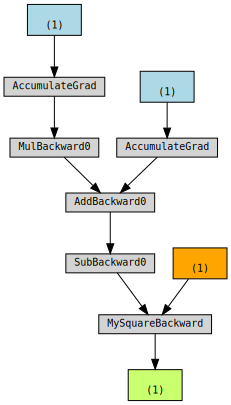

In [20]:
make_dot(L)

In [22]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = 2*x + 1
z = sum(y)
z.backward()

print(x.grad)

tensor([2., 2., 2.])


In [23]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = 2*x + 1
y.backward(gradient=torch.tensor([1, 2, 1]))

print(x.grad)

tensor([2., 4., 2.])


In [25]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = 2*x + 1
z = sum(y)
z.backward()
print(x.grad)


tensor([2., 2., 2.])


In [26]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = 2*x + 1
z = sum(y)
z.backward(retain_graph=True)
print(x.grad) # 2, 2, 2
z.backward(retain_graph=True)
print(x.grad) # 4, 4, 4

tensor([2., 2., 2.])
tensor([4., 4., 4.])


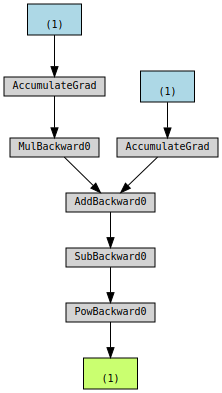

In [27]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)
c = a*x
y_hat = c + b
z = y_hat - y
L = z**2
make_dot(L)

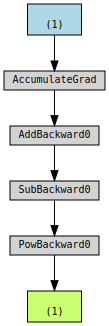

In [28]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
a.requires_grad = False
b = torch.tensor([2.], requires_grad=True)
c = a*x
y_hat = c + b
z = y_hat - y
L = z**2
make_dot(L)